In [3]:
import os

path = f'/home/bhg/visual_dl/lab3/dataset/train/0aaa252e-b503-4503-bdc6-387a5cfe2622'

for root, dirs, files in os.walk(path):
    print(f'root: {root}')
    print(f'dirs: {dirs}')
    print(f'files: {files}')
    for i in files:
        if i in ['class1.tif', 'class2.tif', 'class3.tif', 'class4.tif']:
            print('yes')


root: /home/bhg/visual_dl/lab3/dataset/train/0aaa252e-b503-4503-bdc6-387a5cfe2622
dirs: []
files: ['class4.tif', 'class1.tif', 'image.tif', 'class2.tif']
yes
yes
yes


In [4]:
print(os.listdir(path))

['class4.tif', 'class1.tif', 'image.tif', 'class2.tif']


In [6]:
import pathlib

path = pathlib.Path(path)

a =  [
    entry.name for entry in path.iterdir()
    if entry.name.startswith("class") and entry.is_file()
]

print(a)

['class4.tif', 'class1.tif', 'class2.tif']


In [13]:
a = f'/home/bhg/visual_dl/lab3/dataset/train/ed099e4d-89d2-4579-bd08-80dd26ebdb9e/class3.tif'
import skimage.io as sio
mask = sio.imread(a)

print(mask.shape)

output= []
for i in mask:
    print(i)
    for j in i:
        if j not in output:
            output.append(float(j))
print(output)


(264, 241)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
samples = []
root= os.path.join('../', 'dataset/train')
for img_dir in os.listdir(root):
    tmp_dir = os.path.join(root, img_dir)

    # if not self.is_test:
    img_path = os.path.join(tmp_dir, 'image.tif')
    
    mask_paths = [
        entry.name for entry in pathlib.Path(tmp_dir).iterdir()
        if entry.name.startswith("class") and entry.is_file()
    ]

    samples.append({'image': img_path, 'masks': mask_paths})
print(samples[0])

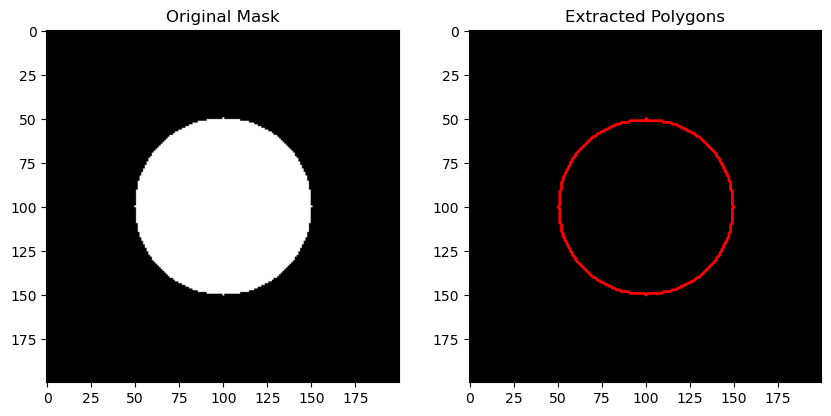

找到 1 個多邊形
第一個多邊形前5個座標點：
[100, 50, 99, 51, 91, 51, 90, 52, 86, 52]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mask_to_polygons(mask, epsilon=1.0):
    """將二值遮罩轉換為多邊形頂點列表
    
    Args:
        mask (numpy.ndarray): 二值化圖像 (0/255)
        epsilon (float): 多邊形近似精度參數 (當前代碼未使用)
    
    Returns:
        list: 多邊形頂點列表 [[x1,y1,x2,y2,...], ...]
    """
    contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    polygons = []
    for contour in contours:
        if len(contour) > 2:
            poly = contour.reshape(-1).tolist()
            if len(poly) > 4:  # 至少需要2個點才能構成多邊形
                polygons.append(poly)
    return polygons

# --------------------------
# 示例使用
# --------------------------
# 創建測試用二值遮罩 (200x200 像素)
mask = np.zeros((200, 200), dtype=np.uint8)
cv2.circle(mask, (100, 100), 50, 255, -1)  # 繪製白色圓形

# 提取多邊形
polygons = mask_to_polygons(mask)

# --------------------------
# 可視化結果
# --------------------------
plt.figure(figsize=(10, 5))

# 原始遮罩
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Original Mask')

# 多邊形繪製
plt.subplot(1, 2, 2)
plt.imshow(np.zeros_like(mask), cmap='gray')
for poly in polygons:
    # 將一維列表轉換為二維座標點
    points = np.array(poly).reshape(-1, 2)
    # 繪製多邊形邊界
    plt.plot(points[:,0], points[:,1], 'r-', linewidth=2)
    # 連接首尾點形成閉合區域
    plt.plot([points[-1,0], points[0,0]], 
             [points[-1,1], points[0,1]], 'r-', linewidth=2)
plt.title('Extracted Polygons')
plt.show()

# --------------------------
# 輸出解析
# --------------------------
print(f"找到 {len(polygons)} 個多邊形")
print("第一個多邊形前5個座標點：")
print(polygons[0][:10])  # 展示前5個x,y座標 (即前10個元素)

In [ ]:
target = {
    "boxes": torch.tensor([
        [100, 120, 300, 400],    # 實例1邊界框
        [400, 50, 550, 200]      # 實例2邊界框
    ], dtype=torch.float32),
    
    "labels": torch.tensor([1, 3], dtype=torch.int64),  # 類別標籤
    
    "masks": torch.stack([
        torch.zeros(600,800).bernoulli_(0.1),  # 實例1掩碼
        torch.zeros(600,800).bernoulli_(0.3)   # 實例2掩碼
    ]).byte()
}

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

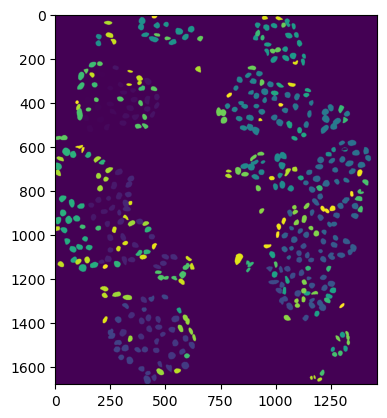

: 

In [ ]:
import skimage.io as sio
import matplotlib.pyplot as plt
import numpy as np

mask_path=f'/home/bhg/visual_dl/lab3/dataset/train/4da4fe48-2c18-437c-894c-d3af27b99de3/class1.tif'
mask = sio.imread(mask_path)
labels = np.unique(mask)
print(labels)
plt.imshow(mask)

res = {}

masks = []
ls = []
for label in labels:
    if label == 0:
        continue
        
    tmp = np.zeros_like(mask)
    tmp[mask == label] = 1
    masks.append(tmp)
    ls.append(label)

res['mask'] = masks
res['label'] = ls
print(res)

In [2]:
k = f'/home/bhg/visual_dl/lab3/dataset/train/4da4fe48-2c18-437c-894c-d3af27b99de3/image.tif'
import cv2
img = cv2.imread(k)
print(img.shape)

(1678, 1463, 3)


In [ ]:
import numpy as np
a = [[0,1,2], [2,3,4]]
b = np.concatenate(a).tolist()

print(b)

NameError: name 'np' is not defined

In [24]:
a = [1,2,3]

for i, j in enumerate(a):
    print(f'{i} {j}')

0 1
1 2
2 3


In [ ]:
from pycocotools.coco import COCO as cc
a = cc('/home/bhg/visual_dl/lab3/dataset/train_coco.json')

img_id = a.getImgIds(imgIds=0)
dd = a.loadImgs(img_id)
print(dd)
size = [dd[0]['height'], dd[0]['width']]
print(size)

ann_ids = a.getAnnIds(imgIds=0)
annotations = a.loadAnns(ann_ids)
print(annotations)

seg = annotations[0]['segmentation']
seg

from pycocotools import mask as coco_mask
import numpy as np

def poly2mask(segmentation, img_size):
    """
    多邊形標註轉二值掩碼
    :param segmentation: COCO格式的多邊形坐標列表 [[x1,y1,x2,y2,...]]
    :param img_size: 目標圖像尺寸 (height, width)
    """
    # 自動檢測標註類型
    if isinstance(segmentation, dict):
        # 處理RLE格式
        return coco_mask.decode(segmentation)
    else:
        # 處理多邊形格式
        rle = coco_mask.frPyObjects(segmentation, img_size[0], img_size[1])
        return coco_mask.decode(rle)
b = poly2mask(seg, size)
b

c = a.getCatIds()
cc = a.loadCats(c)
cc

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
[{'id': 0, 'file_name': '../dataset/train/792c2aff-8a9d-41dc-a3e6-af44c7226a1e/image.tif', 'height': 424, 'width': 684}]
[424, 684]
[{'id': 1, 'image_id': 0, 'category_id': 1, 'segmentation': [[266, 266, 265, 267, 263, 267, 259, 271, 259, 272, 257, 274, 256, 274, 256, 275, 255, 276, 255, 277, 254, 278, 254, 279, 253, 280, 253, 281, 251, 283, 251, 284, 250, 285, 250, 291, 251, 291, 252, 292, 254, 292, 255, 291, 256, 291, 257, 290, 258, 290, 259, 289, 260, 289, 264, 285, 265, 285, 268, 282, 269, 282, 271, 280, 271, 279, 272, 278, 272, 277, 274, 275, 274, 274, 275, 273, 275, 268, 274, 267, 273, 267, 272, 266]], 'area': 365.0, 'bbox': [250, 266, 26, 27], 'iscrowd': 0}, {'id': 2, 'image_id': 0, 'category_id': 1, 'segmentation': [[280, 361, 279, 362, 277, 362, 275, 364, 274, 364, 273, 365, 272, 365, 271, 366, 270, 366, 268, 368, 267, 368, 267, 369, 265, 371, 264, 371, 263, 372, 263, 373, 260, 376, 259, 376, 25

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], shape=(424, 684, 1), dtype=uint8)